In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("../DATA/pennies.jpg")

In [3]:
def displayim(img,cmap=None):
    plt.figure(figsize=(12,10))
    plt.imshow(img,cmap)

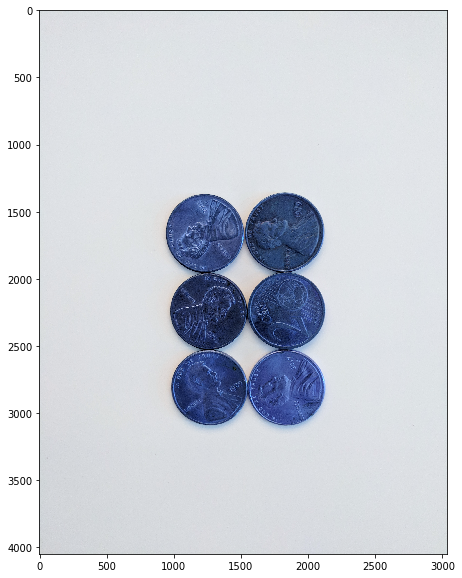

In [7]:
displayim(img)

In [8]:
blurred = cv2.medianBlur(img,25)

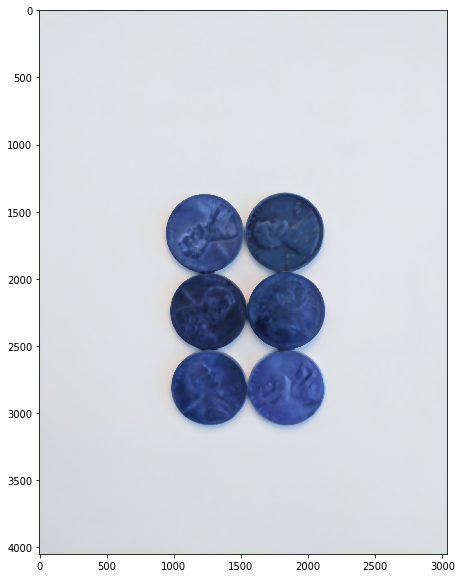

In [9]:
displayim(blurred)

In [11]:
grayim = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)

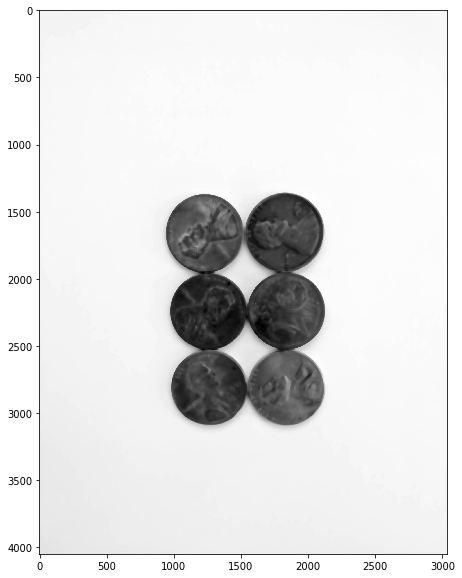

In [13]:
displayim(grayim,"gray")

In [23]:
ret, thresh1 = cv2.threshold(grayim,160,255,cv2.THRESH_BINARY_INV)

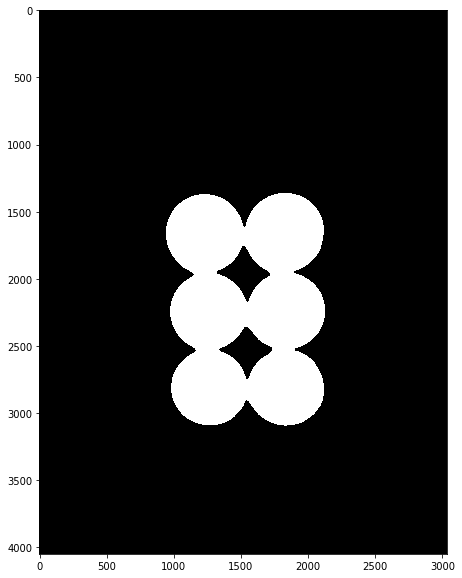

In [24]:
displayim(thresh1,"gray")

In [25]:
image, contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [28]:
contours[0]

array([[[1816, 1360]],

       [[1815, 1361]],

       [[1805, 1361]],

       ...,

       [[1857, 1361]],

       [[1847, 1361]],

       [[1846, 1360]]], dtype=int32)

In [30]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [31]:
imcpy = img.copy()

In [32]:
for i in range(len(hierarchy)):
    if hierarchy[0][i][-1] == -1:
        cv2.drawContours(imcpy,contours,i,(255,0,0),10)

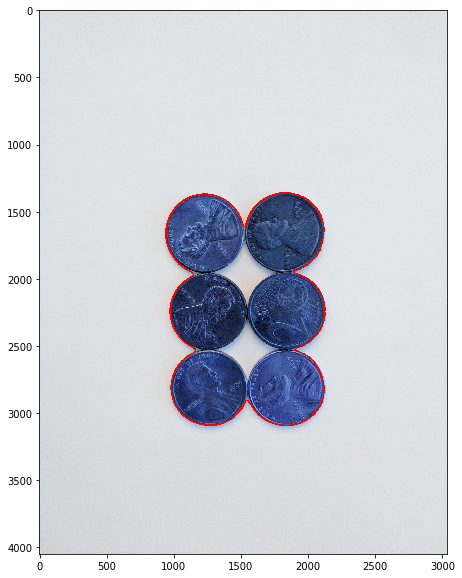

In [33]:
displayim(imcpy)

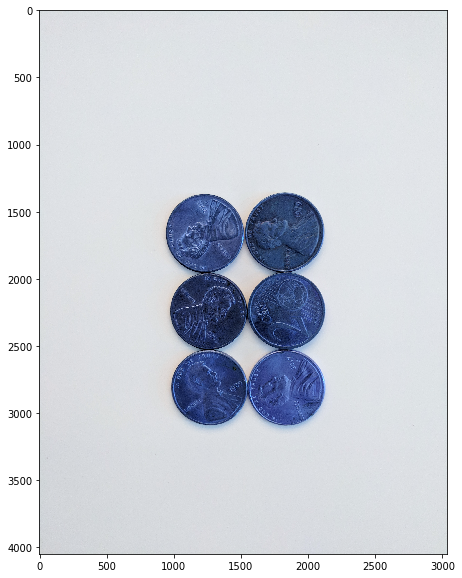

In [5]:
displayim(img)

In [6]:
imcpy = img.copy()

In [7]:
blurred = cv2.medianBlur(imcpy,35)

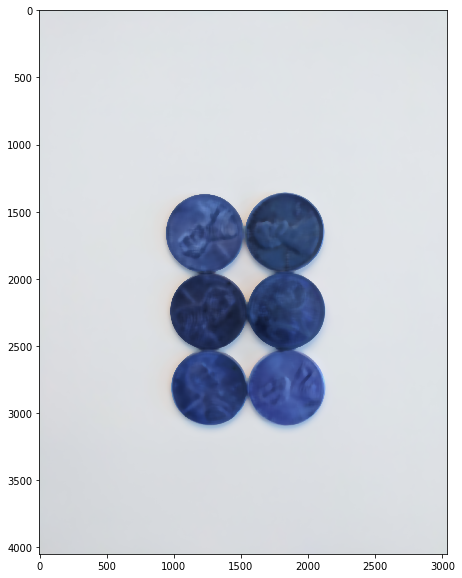

In [9]:
displayim(blurred)

In [10]:
grayim = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)

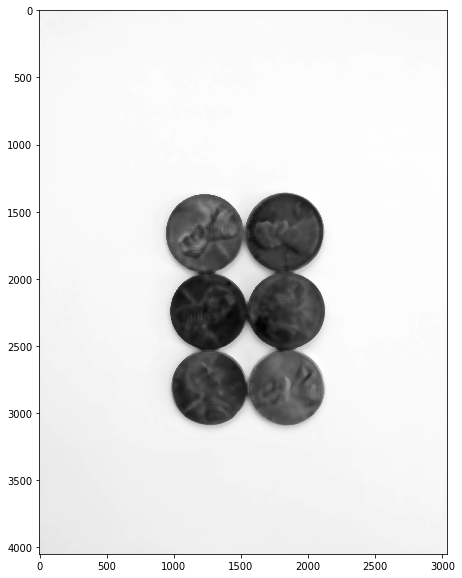

In [12]:
displayim(grayim,"gray")

In [18]:
ret,thresh1 = cv2.threshold(grayim,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

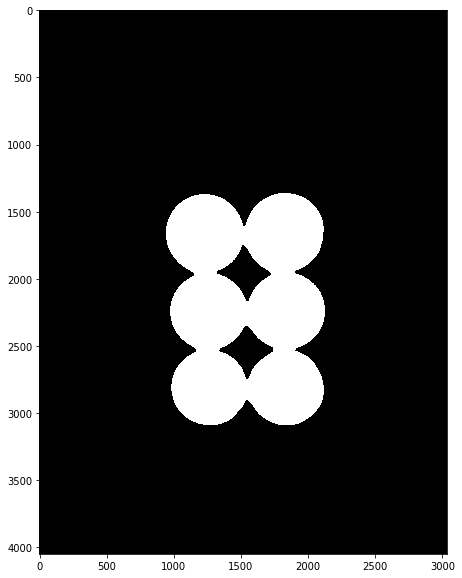

In [19]:
displayim(thresh1,"gray")

In [20]:
kernel = np.ones((3,3),"uint8")

In [21]:
opening = cv2.morphologyEx(thresh1,cv2.MORPH_OPEN,kernel)

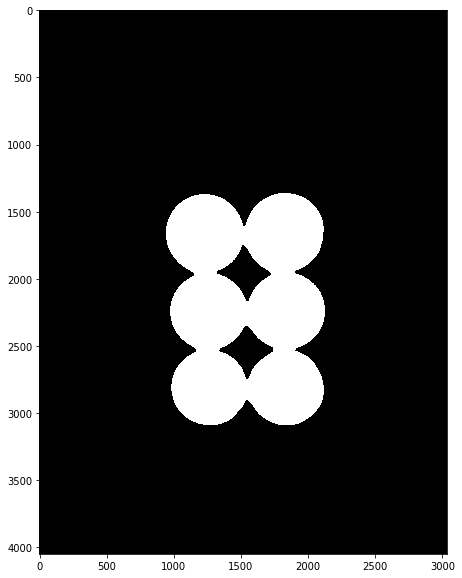

In [23]:
displayim(opening,"gray")

In [24]:
sure_bg = cv2.morphologyEx(opening,cv2.MORPH_DILATE,kernel)

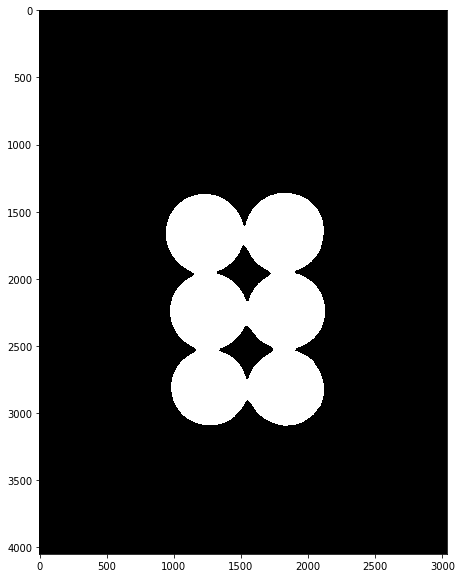

In [26]:
displayim(sure_bg,"gray")

In [27]:
dst = cv2.distanceTransform(opening,cv2.DIST_L2,5)

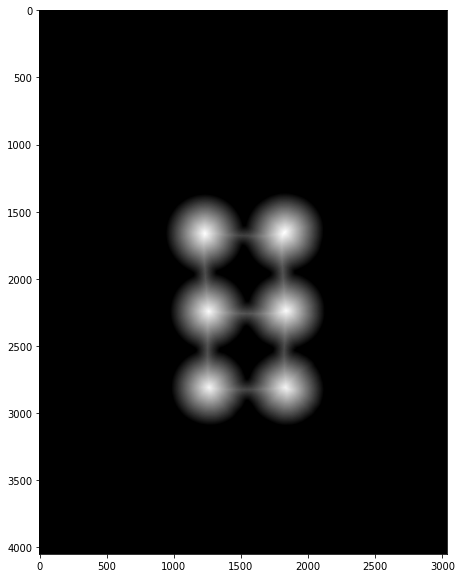

In [28]:
displayim(dst,"gray")

In [30]:
ret, sure_fg = cv2.threshold(dst,0.7*dst.max(),255,cv2.THRESH_BINARY)

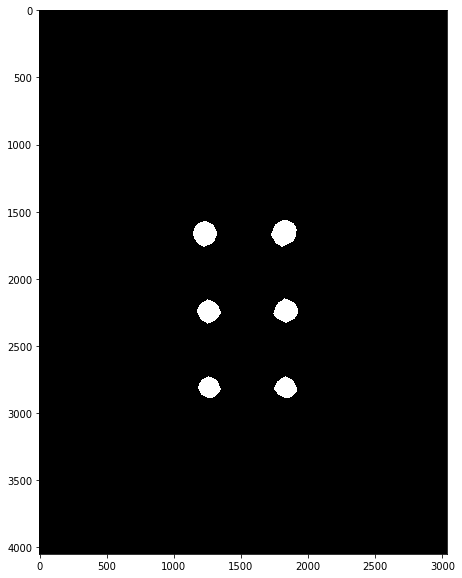

In [31]:
displayim(sure_fg,"gray")

In [32]:
sure_bg.dtype

dtype('uint8')

In [33]:
sure_fg.dtype

dtype('float32')

In [35]:
sure_fg = sure_fg.astype('uint8')

In [36]:
subbed = cv2.subtract(sure_bg,sure_fg,)

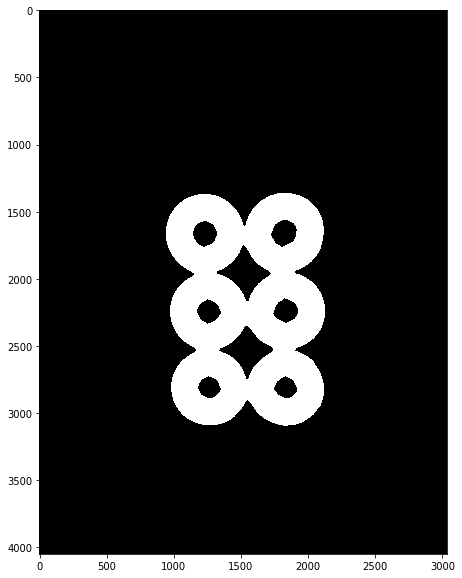

In [37]:
displayim(subbed,"gray")

In [42]:
ret, markers = cv2.connectedComponents(sure_fg)

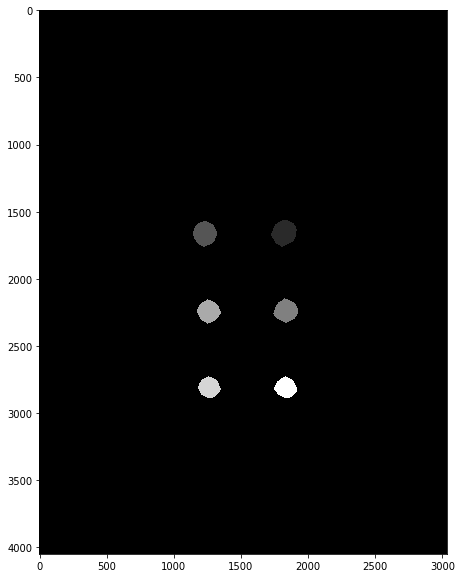

In [43]:
displayim(markers,"gray")

In [44]:
markers += 1 

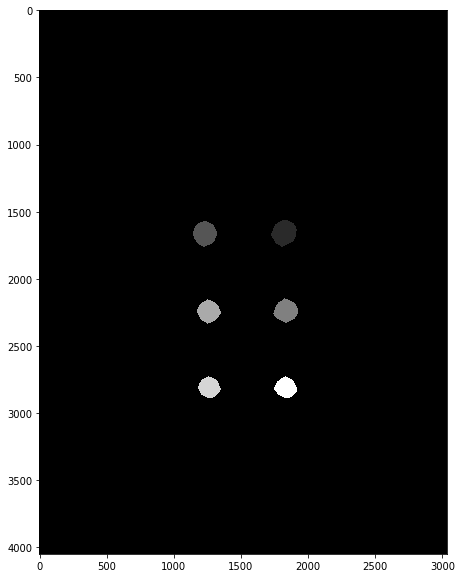

In [45]:
displayim(markers,"gray")

In [46]:
markers[subbed == 255] = 0

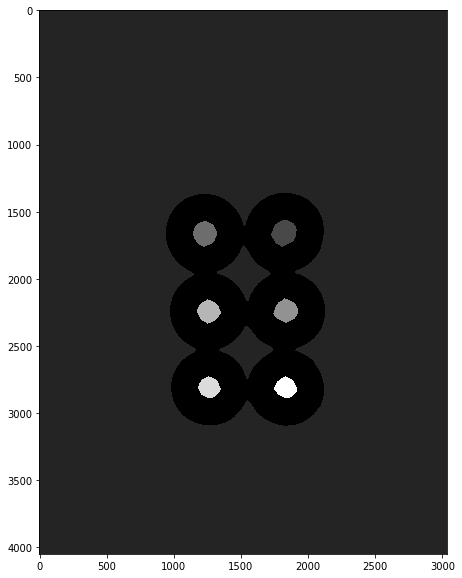

In [48]:
displayim(markers,"gray")

In [50]:
out = cv2.watershed(img,markers)

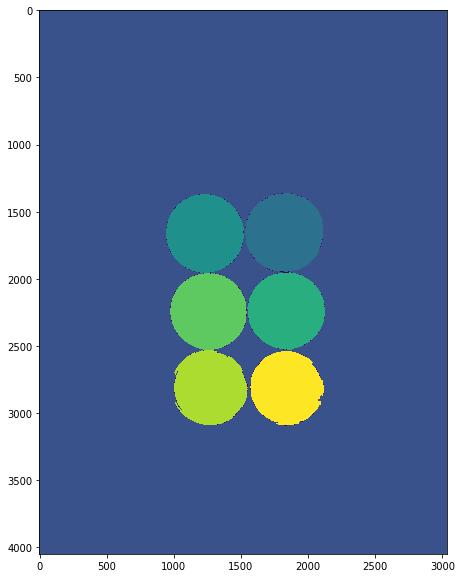

In [51]:
displayim(out)

In [52]:
image, contours, hierarchy = cv2.findContours(out,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [53]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [-1,  9, -1, -1]]], dtype=int32)

In [62]:
for i in range(len(contours)):
    #print(i)
    cv2.drawContours(imcpy,contours,i,(255,0,0),13)

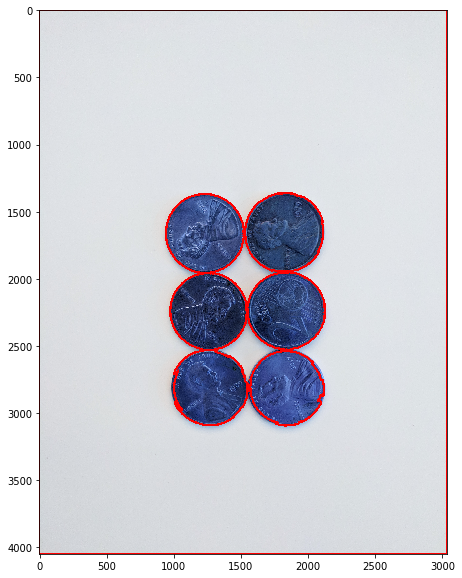

In [63]:
displayim(imcpy)